In [1]:
import numpy as np
import pandas as pd
from itertools import combinations,combinations_with_replacement
from functools import reduce
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import seaborn as sns

<font color=black size=6><u><b>Part A: Model Code</b></u></font>

In [2]:
#15 implementaiton of one_hot_labels

def one_hot_labels(Y):
    numOfIndices = np.unique(Y)
    oneHotVec = np.zeros(len(numOfIndices))
    Y_one_hot = []
    for i in range(len(Y)):
        for j in range(len(numOfIndices)):
            if Y[i] == numOfIndices[j]:
                oneHotVec[j] = 1
                Y_one_hot.append(oneHotVec)
        oneHotVec = np.zeros(len(numOfIndices))
        
    Y_one_hot = np.asarray(Y_one_hot)
                
    return Y_one_hot

In [3]:
#16 Implementation of softmax(score)

def softmax(score):
    Y_expo = np.exp(score)
    Y_proba = Y_expo/Y_expo.sum()
    return Y_proba

In [4]:
#17 implementation of cross entropy cost function

def cross_entropy_loss(Y_one_hot, Y_proba):
    cost = np.sum(-Y_one_hot*np.log(Y_proba))
    return cost

In [5]:
#18 implementation of Softmax Regression class

class Softmax_Regression():
    
    def __init__(self):
        self.Theta = None
        pass
    
    def fit(self, X, Y, learning_rate = 0.01, epochs = 1000, tol = None,
           regularizer = None, lambd = 0.0, early_stopping = False,
           validation_fraction = 0.1, **kwargs):
        
        n = X.shape[0]
        ones = np.ones(n)
        ones_reshaped = np.reshape(ones, (n, -1))
        featswithbias = np.hstack((ones_reshaped, X))
        X = featswithbias

        Y = one_hot_labels(Y)
        
        Theta = []
        Theta_hat = np.zeros((X.shape[1], Y.shape[1]))
        
        for epoch in range(epochs):

            Xtheta = np.matmul(X,Theta_hat)
            
            Theta_prev = Theta_hat

            if regularizer == None:

                j_theta = -(1/n)*np.matmul(X.T,(Xtheta - Y))
                    
                Theta_hat -= (learning_rate*j_theta)

                self.Theta = Theta_hat

            elif regularizer=='l1':

                j_theta = -(1/n)*((np.matmul(X.T, (Xtheta - Y))) - ((lambd/2)*np.sign(Theta_hat)))

                Theta_hat -= (learning_rate*j_theta)

                self.Theta = Theta_hat

            elif regularizer=='l2':

                j_theta = -(1/n)*((np.matmul(X.T, (Xtheta - Y))) + lambd*Theta_hat)

                Theta_hat -= (learning_rate*j_theta) 

                self.Theta = Theta_hat
            else:
                print('Wrong input')
            
            Theta_cur = Theta_hat
            
            if tol < np.sum(Theta_cur) - np.sum(Theta_prev):
                break
            
    def predict(self, X):
        y_preds = []
        ones = np.ones(X.shape[0])
        ones = np.reshape(ones, (X.shape[0] ,-1))
        features= np.hstack((ones,X))
        
        
        Y_scores = np.matmul(features, self.Theta)
        
        Y_probs = softmax(Y_scores)
        
        MaxAtRow = float('-inf')
        for i in range(Y_probs.shape[0]):
            for j in range(Y_probs.shape[1]):
                if MaxAtRow < Y_probs[i][j]:
                    MaxAtRow = Y_probs[i][j]
                    Class = j
            y_preds.append(Class)
            MaxAtRow = float('-inf')
            
        return y_preds

In [6]:
#Accuracy function to get accuracy from 1st programming assignment

def Accuracy(a,b):
    gen_err = np.sum(abs(np.array(a)-np.array(b)))/len(a)
    acc = 1-gen_err
    return acc

#function to generate the confusion matrix
def conf_mat(pred,Y):
    conf_mat = {"TP":0,"TN":0,"FP":0,"FN":0}
    err = pred-Y
    for i,v in enumerate(pred):
        if(err[i]==0):
            if(Y[i]==0):
                conf_mat["TN"] += 1
            else:
                conf_mat["TP"] += 1
        else:
            if(Y[i]==0):
                conf_mat["FP"] += 1
            else:
                conf_mat["FN"] += 1
    return conf_mat

<font color=black size=6><u><b>Part B : Exploratory Data Analysis</b></u></font>

In [7]:
#19 Reading Iris data with sklearn

from sklearn.datasets import load_iris

df = load_iris()
data = load_iris().data
target = load_iris().target


#Transforming dataset into dataframe so it is eaiser to process
dataset = pd.DataFrame({'sepal length' : data[:, 0],
                        'sepal width' : data[:, 1],
                        'petal length' : data[:, 2],
                        'petal width' : data[:, 3],
                        'class' : target})

In [8]:
#20 Summarization of dataset in terms of Mean, Standard deviation, and quartiles

# Quick check of the data
print("\n\n< Iris dataset - first five rows>\n", dataset.head())

# Summary of the numerical attributes
print("\n\n< Summary of the numerical attributes >\n", dataset.describe())



< Iris dataset - first five rows>
    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


< Summary of the numerical attributes >
        sepal length  sepal width  petal length  petal width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      

In [9]:
#21 Shuffling the rows of the dataset


print("\n\n21. Shuffle the rows of your data. You can use def=df.sample(frac=1) as an idiomatic way")
print("   to shuffle the data in Pandas without losing column names.")
df_shuff = dataset.sample(frac = 1)

print("\n\n Shuffled dataset - first five rows")
df_shuff.head()



21. Shuffle the rows of your data. You can use def=df.sample(frac=1) as an idiomatic way
   to shuffle the data in Pandas without losing column names.


 Shuffled dataset - first five rows


,sepal length,sepal width,petal length,petal width,class
60,5.0,2.0,3.5,1.0,1
3,4.6,3.1,1.5,0.2,0
84,5.4,3.0,4.5,1.5,1
21,5.1,3.7,1.5,0.4,0
49,5.0,3.3,1.4,0.2,0



< Pair Plots(seaborn) >


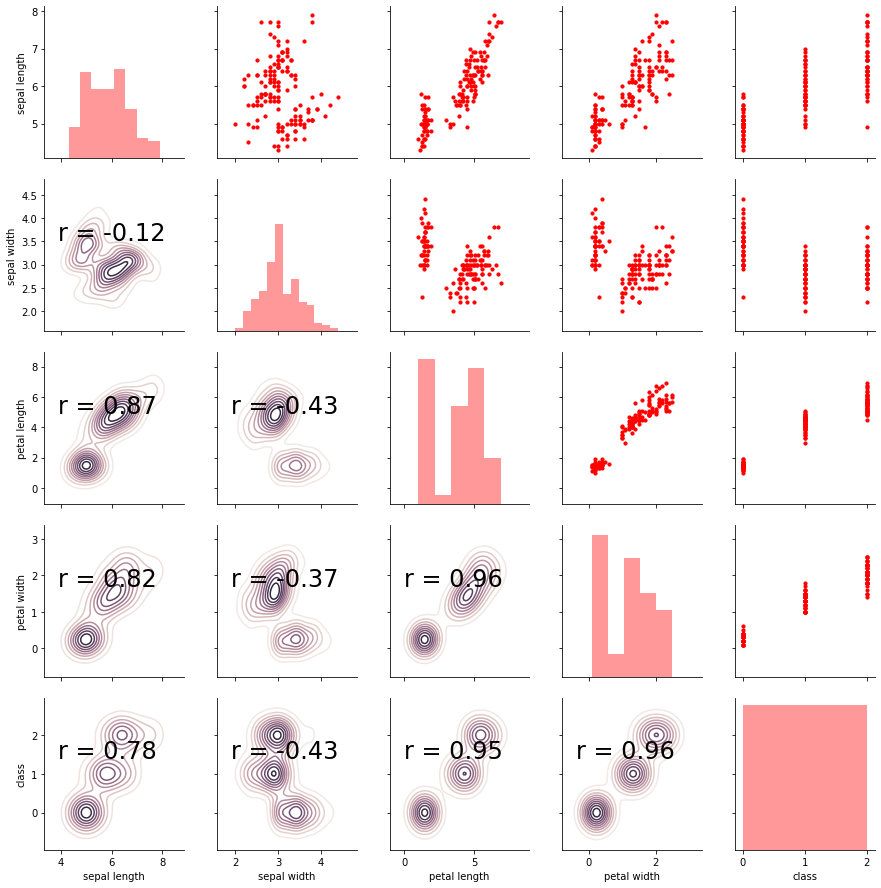

In [10]:
print("\n< Pair Plots(seaborn) >")
import warnings
warnings.filterwarnings('ignore')
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(X, y, **kws):
    r, _ = stats.pearsonr(X, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy = (.1, .6), xycoords = ax.transAxes, size = 24)
    
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)

sns.set_context(font_scale = 2)

# Pair grid set up
g = sns.PairGrid(df_shuff)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [11]:
#23 Scaling the features

X = dataset.drop(columns = 'class')
y = dataset['class']


X_mean = np.mean(X)
X_std  = np.std(X)
X_scaled =  (X-X_mean)/X_std
X = X_scaled
print("\n< Scaled Features >\n", X_scaled.head())


< Scaled Features >
    sepal length  sepal width  petal length  petal width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


In [12]:
#24 Partition of train-test. This function is from previous assignments

def partition(X_data, y_data, testSIZE):
    # create random train/test split
    index = np.arange(X_data.shape[0])
    num_training_index = int((1 - testSIZE)*X_data.shape[0])
    # data shuffling randomly
    index_shuf = np.random.shuffle(index)
    # split the actual data
    train_index = index[:num_training_index]
    test_index = index[num_training_index:]
    X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_train, X_test, y_train, y_test = partition(X, y, testSIZE = 0.2)

<font color=black size=6><u><b>Part C : Model Evaluation</b></u></font>

In [13]:
# Modified kFord from first assignment.
# need this to evaluate the model, and for hyperparameter tunning

def sFold(cv, X, Y, model, learning_rate, regularizer, lambd,tol):
    Xfolded = np.split(X,cv)
    yfolded = np.split(Y,cv)
    exp = []
    predbymod = []
    # For each partition
    errors = []
    X_cv_train = []
    X_cv_test = []
    y_cv_train = []
    for cvs in range(cv):
        XfoldedTrain = []
        yfoldedTrain = []
        XfoldedTest = Xfolded[cvs]
        yfoldedTest = yfolded[cvs]
        for train in range(cv):
            if train != cvs:
                if len(XfoldedTrain) == 0:
                    XfoldedTrain = Xfolded[train]
                    yfoldedTrain = yfolded[train]
                else:
                    XfoldedTrain = np.vstack((XfoldedTrain,Xfolded[train]))
                    yfoldedTrain = np.append(yfoldedTrain,yfolded[train])
        
        exp.append(yfoldedTest)
        
        myModel = model()

        myModel.fit(XfoldedTrain, yfoldedTrain,learning_rate = learning_rate,
                    tol = tol, regularizer = regularizer, lambd = lambd)

        pred = myModel.predict(XfoldedTest)
        predbymod.append(pred)
        
        predarr = np.asarray(pred)

        error = 0
        error = Accuracy(yfoldedTest,pred)
        floaterr = np.array(errors, dtype = np.float64)
        floaterr = np.append(floaterr, error)
        errors = np.mean(floaterr)
 
    return errors

In [14]:
#25 Hyperparameter tuning: cv == 5

lambd= [0.1, 0.01, 0.001, 0.0001]
tol = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
learning_rate = [0.1, 0.01, 0.001]
regularizer= ['l1', 'l2']

optAccu = 0
for l in range(len(lambd)):
    for t in range(len(tol)):
        for lr in range(len(learning_rate)):
            for r in range(len(regularizer)):
                print("for lambda: ", lambd[l]," tol :", tol[t],
                      " learning rate: ",learning_rate[lr],
                      " regularizer: ", regularizer[r])
                print(" The Accuracy is: ",
                      sFold(5, X_train, y_train, Softmax_Regression,
                            learning_rate[lr], regularizer[r], lambd[l], tol[t]))
                if optAccu < sFold(5, X_train, y_train, Softmax_Regression, 
                                   learning_rate[lr], regularizer[r], lambd[l], tol[t]):
                
                    optAccu = sFold(5, X_train, y_train, Softmax_Regression,
                            learning_rate[lr], regularizer[r], lambd[l], tol[t])
                    
                    a = lambd[l]
                    b = tol[t]
                    c = learning_rate[lr]
                    d = regularizer[r]

                    
print("\n\n---------------------------------------------------------\n\n")                    
print("The hyperparameters are: \n")
print("lambda: ", a," tol :", b,
      " learning rate: ",c,
      " regularizer: ", d)

print("Optimal Accuracy: ", optAccu)


for lambda:  0.1  tol : 0.001  learning rate:  0.1  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.001  learning rate:  0.1  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.001  learning rate:  0.01  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.001  learning rate:  0.01  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.001  learning rate:  0.001  regularizer:  l1
 The Accuracy is:  -0.7109375
for lambda:  0.1  tol : 0.001  learning rate:  0.001  regularizer:  l2
 The Accuracy is:  -0.7109375
for lambda:  0.1  tol : 0.0001  learning rate:  0.1  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.0001  learning rate:  0.1  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.0001  learning rate:  0.01  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.1  tol : 0.0001  learning rate:  0.01  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0

for lambda:  0.001  tol : 1e-06  learning rate:  0.001  regularizer:  l2
 The Accuracy is:  -0.7109375
for lambda:  0.001  tol : 1e-07  learning rate:  0.1  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.001  tol : 1e-07  learning rate:  0.1  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.001  tol : 1e-07  learning rate:  0.01  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.001  tol : 1e-07  learning rate:  0.01  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.001  tol : 1e-07  learning rate:  0.001  regularizer:  l1
 The Accuracy is:  -0.7109375
for lambda:  0.001  tol : 1e-07  learning rate:  0.001  regularizer:  l2
 The Accuracy is:  -0.7109375
for lambda:  0.0001  tol : 0.001  learning rate:  0.1  regularizer:  l1
 The Accuracy is:  0.640625
for lambda:  0.0001  tol : 0.001  learning rate:  0.1  regularizer:  l2
 The Accuracy is:  0.640625
for lambda:  0.0001  tol : 0.001  learning rate:  0.01  regularizer:  l1
 The Accuracy is:  0

In [15]:
#26 evaluating model on the test data.

mySoftMax = Softmax_Regression()
mySoftMax.fit(X_train, y_train, learning_rate = 0.1, regularizer = 'l1',
             lambd = 0.1, tol = 0.001)
test_predicted = mySoftMax.predict(X_test)

Eval = Accuracy(test_predicted, y_test)
print("Test Accuracy: ", Eval)
 
EvalConfMat = conf_mat(test_predicted, y_test)
print("Confusion Matrix:\t{}".format(EvalConfMat))

Test Accuracy:  0.6333333333333333
Confusion Matrix:	{'TP': 13, 'TN': 6, 'FP': 0, 'FN': 11}
